# Yasir Hassan
# Project 1
# Decision Tree, and Random Forest
# with parameters optimization, to evaluate 
# the performance of the classification

In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
# read data into pandas dataFrame
df = pd.read_csv(r"C:\Users\NeverGiveUp\Desktop\Input File2\BDParkinson_Prediction .csv")

In [3]:
# display head of the data
df.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,CLASS
0,0.624731,0.135424,0.0,0.675282,0.182203,0.962960,Class_1
1,0.647223,0.136211,0.0,0.679511,0.195903,0.987387,Class_1
2,0.706352,0.187593,0.0,0.632989,0.244884,0.991182,Class_1
3,0.680291,0.192076,0.0,0.651786,0.233528,0.991857,Class_1
4,0.660104,0.161131,0.0,0.677162,0.209531,0.991066,Class_1


In [4]:
# convert Class column from String to numerical data type.
df['CLASS'].replace({'Class_1':1.0, 'Class2':2.0,'Class_3':3.0, 'Class_4':4.0}, inplace = True)

In [5]:
# check the to see Class column is converted to numerical (float)
df.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,CLASS
0,0.624731,0.135424,0.0,0.675282,0.182203,0.962960,1.0
1,0.647223,0.136211,0.0,0.679511,0.195903,0.987387,1.0
2,0.706352,0.187593,0.0,0.632989,0.244884,0.991182,1.0
3,0.680291,0.192076,0.0,0.651786,0.233528,0.991857,1.0
4,0.660104,0.161131,0.0,0.677162,0.209531,0.991066,1.0


In [6]:
# seperate features from labels
X = df[['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5']]
y = df['CLASS']

In [7]:
# Scale the features using StandardScaler class.
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [8]:
# seperate the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

In [9]:
# using a single Decision Tree classifier to instantiate a tree object.
# and seed the classifier with random_state = 0
tree = DecisionTreeClassifier(random_state = 0)

In [10]:
# fit the DT classifier with training data
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [11]:
# print ou the accuracy on the training set 
# and the accuracy of the test set.
print("Accuracy on training set: {:.2f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.98


In [12]:
# finding the confusion matrix of the training set of a single tree.
y_pred = tree.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
cm

array([[103,   0,   0,   0],
       [  0,  98,   0,   0],
       [  0,   0,  95,   0],
       [  0,   0,   0, 104]], dtype=int64)

In [13]:
# The training set is 100% because the leaves are pure.
# The tree was grown deep enough that it could perfectly memorize 
# all the labels on the training data. 
# The test set accuracy 97% accuracy.

In [14]:
# Now a pply pre-pruning to the tree, which will stop developing
# the tree before it perfectly fits to the training data. 
# This will stop building the tree after a certain depth
# has been reached, which is 4, level
# And then fit the tree clf with training data
tree = DecisionTreeClassifier(max_depth= 4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [15]:
# Display the score for both training and then testing data
# after applying pre-pruning to the tree, where max_depth = 4
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.970


In [16]:
# Applying pre-pruning to the tree will stop developing
# the tree before fiting to the training data. 
# So, stop building the tree after a certain depth has been reached. 
# Here I set max_depth =4, meaning only
# four consecutive questions can be asked. 
# Limiting the depth of the tree decreases overfitting. 
# This lead to a lower accuracy on the training set.

In [17]:
# Visualize the tree using the export_graphviz function from the tree module
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["Class_1", "Class2", "Class_3", "Class_4"],
                impurity=False, filled=True)

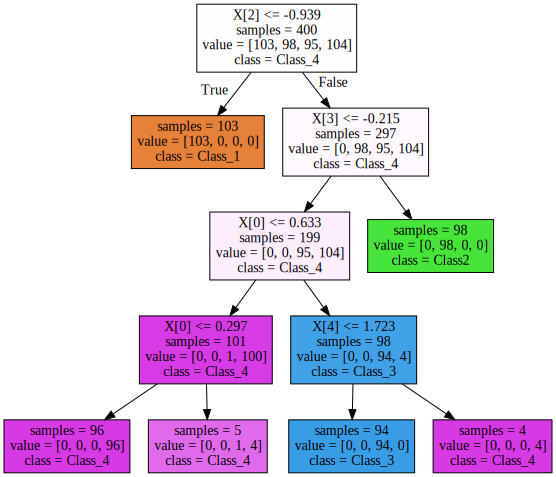

In [18]:
# Visualization of the decision tree built:
# Read the file and visualize it, using the graphviz module
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [19]:
# Feature Importance in Trees:
# Instead of looking at the whole tree, I use
# Feature importance, which rates how important each feature is for
# the decision a tree makes.
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.30182225 0.         0.34199928 0.33045146 0.02572702]


In [20]:
# Parameter Optimization, to Evaluate the Performance of 
# a single decision tree.
# I use GridsearchCV classifier for finding the best parameters
initial_param = {
    "criterion":["gini", "entropy"],
    "max_depth":[1,2,3,4,5,6,7, None]
}
grid = GridSearchCV(tree, param_grid = initial_param, cv = 5, n_jobs = -1)

In [21]:
# fit the grid with training data set.
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]},
     

In [22]:
# Finding GridSearch best estimator
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [23]:
# Grid Search best score
grid.best_score_

0.9974999999999999

In [24]:
# Grid Search best parameters
grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [25]:
# using best found parameters to initialize DecisionTreeClassifier
# And then fit the tree classifier with training data
tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [26]:
# predict the test data
y_pred = tree.predict(X_test)

In [27]:
# Find the confusion matrix for the test data
# by comparing y_test with the prediction of X_test
cm = confusion_matrix(y_test, y_pred)
cm

array([[22,  0,  0,  0],
       [ 0, 27,  0,  0],
       [ 0,  0, 27,  3],
       [ 0,  0,  0, 21]], dtype=int64)

In [28]:
# find the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.97

In [29]:
# Now, building a random forest consisting of 10 trees on the data
# The choice of 10 trees is Arbitrary.
forest = RandomForestClassifier(n_estimators= 10, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [30]:
# The trees that are built as part of the random forest are stored in the estimator_ attribute. 
# Visualize the decision boundaries learned by each tree, together with
# their aggregate prediction as made by the forest

In [31]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.970


In [32]:
# The random forest gave an accuracy of 97%,
# without tuning any parameters. I could adjust the max_features setting, 
# or apply pre-pruning as for the single decision tree.
# Often the default parameters of the random forest already work quite well.

In [33]:
# Strengths, weaknesses, and parameters:
# Random forests for regression and classification are
# among the most widely used machine learning methods. They are
# very powerful, often work well without heavy tuning of the parameters, 
# and don’t require scaling of the data.

In [34]:
# Random forests share all of the benefits of decision trees, while making up
# for some of their deficiencies. 
# decision tree is used for compact representation of the decision-making process. 
# It is impossible to interpret tens or hundreds of trees in detail, 
# and trees in random forests tend to be deeper than decision trees. 
# Therefore, to summarize the prediction making in a visual way to nonexperts, 
# a single decision tree might be a better choice. 
# While building random forests on large datasets might be time consuming, 
# it can be parallelized across multiple CPU.

In [35]:
# Parameter optimization, to evaluate the performance of 
# a random forest.
# User GridsearchCV classifier for finding the best parameters
initial_param = {
    "n_estimators" : [1,10,20, 30, 50, 100, None],
    "criterion":["gini"],
}
grid = GridSearchCV(forest, param_grid = initial_param, cv = 5, n_jobs = -1)

In [36]:
# fit the grid with training data set.
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=2,
                                    

In [37]:
# Finding GridSearch best estimator for random forest
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [38]:
# Grid Search best score for the random forest
grid.best_score_

0.9949999999999999

In [39]:
# Grid Search best parameters for random forest
grid.best_params_

{'criterion': 'gini', 'n_estimators': 100}

In [40]:
# buidling a random forest consisting of 100 trees on the data
forest = RandomForestClassifier(criterion= 'gini', n_estimators= 100, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [41]:
# find the accuracy of the prediction of the forest test data.
y_pred = forest.predict(X_test)

In [42]:
# accuracy of the forest
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.96

In [43]:
# confusion matrix for the test data of the forest
cm = confusion_matrix(y_test, y_pred)
cm

array([[22,  0,  0,  0],
       [ 0, 27,  0,  0],
       [ 0,  1, 26,  3],
       [ 0,  0,  0, 21]], dtype=int64)